In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def readTxtFile(inputFile):
    with open(inputFile, "r") as myFile:
        content = myFile.read()
        info = content.split(" ")
        a = int(info[0])
        b = float(info[1])
        c = float(info[2])
        d = int(info[3])
        x0 = int(info[4])
        y0 = int(info[5])
        deltaT = float(info[6])
        T = int(info[7])
        return a, b, c, d, x0, y0, deltaT, T

data = readTxtFile("input.txt")
print(data)

(1, 0.25, 0.1, 1, 50, 1, 0.01, 100)


In [3]:
def FE(a, b, c, d, x0, y0, deltaT):
    nextX = x0 + deltaT*(a*x0 - b*x0*y0)
    nextY = y0 + deltaT*(c*x0*y0 - d*y0)
    return nextX, nextY

In [4]:
def runFE(a, b, c, d, x0, y0, deltaT, T):
    iteratorRange = np.arange(0, T, deltaT)
    FE_x_vals = [x0]
    FE_y_vals = [y0]
    for i in iteratorRange:
        x_o, y_o = FE(a, b, c, d, FE_x_vals[-1], FE_y_vals[-1], deltaT)
        FE_x_vals.append(x_o)
        FE_y_vals.append(y_o)
    return FE_x_vals, FE_y_vals


In [5]:
def makePlot_FE(time, xValues, yVales):
    plt.plot(time, xValues, label='Forward Euler: x(t)-Lantern Flies')
    plt.plot(time, yVales, label='Forward Euler: y(t)-Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Forward Euler Simulation')
    plt.show()

In [6]:
# Leap-frog Iterator
def leapFrog(a, b, c, d, x0, y0, deltaT):
    x1, y1 = FE(a, b, c, d, x0, y0, deltaT)
    nextX = x0 + 2*deltaT*(a*x1 - b*x1*y1)
    nextY = y0 + 2*deltaT*(c*x1*y1 - d*y1)
    return nextX, nextY

In [7]:
def runLeapFrog(a, b, c, d, x0, y0, deltaT, T):
    iteratorRange = np.arange(0, T, deltaT)
    LP_x_Vals = [x0]
    LP_y_vals = [y0]
    for i in iteratorRange:
        if i == 0:
            x_val, y_val = leapFrog(a, b, c, d, x0, y0, deltaT)
            if x_val < 0 or y_val < 0:
                x_val = 0
                y_val = 0
            LP_x_Vals.append(x_val)
            LP_y_vals.append(y_val)
        else:
            x_val = LP_x_Vals[-2] + 2*deltaT*(a*LP_x_Vals[-1] - b*LP_x_Vals[-1]*LP_y_vals[-1])
            y_val = LP_y_vals[-2] + 2*deltaT*(c*LP_x_Vals[-1]*LP_y_vals[-1] - d*LP_y_vals[-1])
            if x_val < 0 or y_val < 0:
                x_val = 0
                y_val = 0
            LP_x_Vals.append(x_val)
            LP_y_vals.append(y_val)
    return LP_x_Vals, LP_y_vals

In [8]:
def makePlot_LP(time, xValues, yVales):
    plt.plot(time, xValues, label='Leap frog: x(t)-Lantern Flies')
    plt.plot(time, yVales, label='Leap frog: y(t)-Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Leap Frog Simulation')
    plt.show()

In [9]:
import matplotlib.pyplot as plt

def makePlot_LP(time, xValues, yValues, zoom_start, zoom_end):
   
    plt.plot(time, xValues, label='Leap frog: x(t) - Lantern Flies')
    plt.plot(time, yValues, label='Leap frog: y(t) - Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Leap Frog Simulation (Full Data)')

    plt.tight_layout()  
    plt.show()



In [10]:
def delx(x_1, y_1, x_0, y_0, deltaT, a, b):
    answer = x_1-x_0-deltaT*(a*x_1-b*x_1*y_1)
    return answer

def dely(x_1, y_1, x_0, y_0, deltaT, c, d):
    answer = y_1-y_0-deltaT*(c*x_1*y_1-d*y_1)
    return answer

In [11]:
def NR_BE(xO, yO, a, b, c, d, deltaT, T):
    iteratorRange = np.arange(0, T, deltaT)
    x_values = [xO]
    y_values = [yO]
    for i in iteratorRange:  
        x_current = x_values[-1]
        y_current = y_values[-1]
        for y in range(10):
            gradientX = delx(x_current, y_current, x_values[-1], y_values[-1], deltaT, a, b)
            gradientY = dely(x_current, y_current, x_values[-1], y_values[-1], deltaT, c, d)

            jacobian_matrix = np.array([[1-deltaT*(a-b*y_current), deltaT*b*x_current], 
                                            [-deltaT*c*y_current , 1-deltaT*(c*x_current-d)]])
            
            inverse_jacobian = np.linalg.inv(jacobian_matrix)
            
            x_current = x_current - ((inverse_jacobian[0, 0]*gradientX) + (inverse_jacobian[0, 1]*gradientY))
            y_current = y_current - ((inverse_jacobian[1, 0]*gradientX) + (inverse_jacobian[1, 1]*gradientY))
        x_values.append(x_current)
        y_values.append(y_current)


    return x_values,y_values

In [12]:
def makePlot_BE(time, xValues, yVales):
    plt.plot(time, xValues, label='Backward Euler: x(t)-Lantern Flies')
    plt.plot(time, yVales, label='Backward Euler: y(t)-Praying Mantises')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Backward Euler Simulation')
    plt.show()

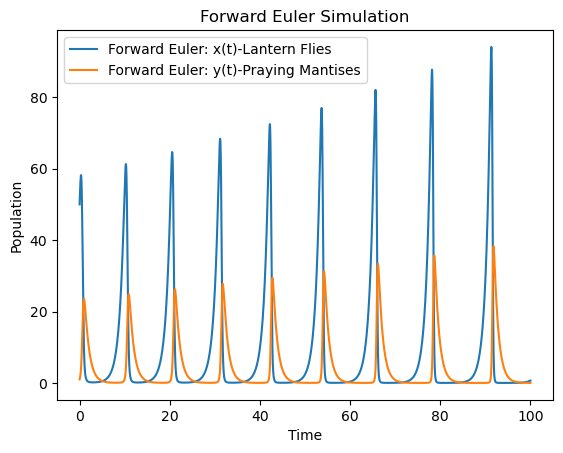

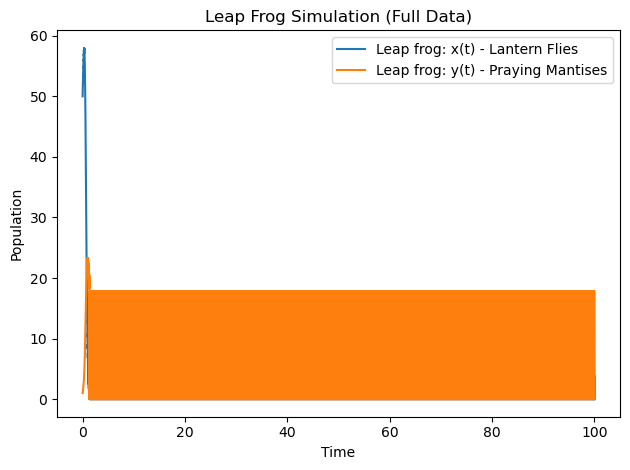

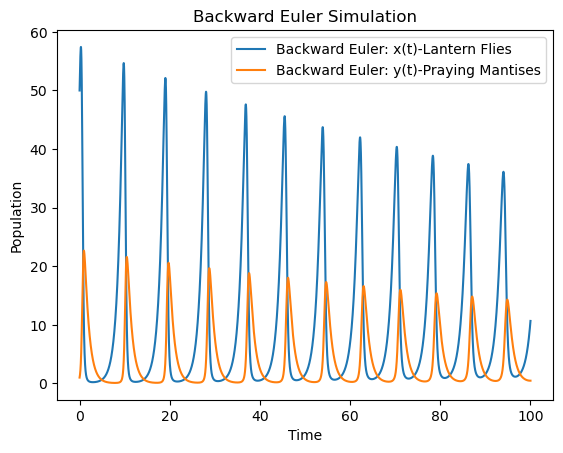

In [13]:
def main():
    a, b, c, d, x0, y0, deltaT, T = readTxtFile("input.txt")
    FE_X, FE_Y = runFE(a, b, c, d, x0, y0, deltaT, T)
    makePlot_FE(np.arange(0, T+deltaT, deltaT), FE_X, FE_Y)
    LP_X, LP_Y = runLeapFrog(a, b, c, d, x0, y0, deltaT, T)
    # makePlot_LP(np.arange(0, T+deltaT, deltaT), LP_X, LP_Y)
    makePlot_LP(np.arange(0, T+deltaT, deltaT), LP_X, LP_Y, 15, 16)
    BE_X, BE_Y = NR_BE(x0, y0, a, b, c, d, deltaT, T)
    makePlot_BE(np.arange(0, T+deltaT, deltaT), BE_X, BE_Y)
if __name__ == "__main__":
    main()
